<a href="https://colab.research.google.com/github/julianazx/caixa-auto-atendimento/blob/main/SistemaBanc%C3%A1rio(ATM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Código do Projeto de uma Modelagem de um caixa de auto-atendimento (ATM)**

###**Passo a Passo de como utilizar o código**


1. Baixe o arquivo “clientes.csv” disponibilizado no drive de reposição do trabalho
2. Conecte o google colab ao drive com o comando:
```
from google.colab import drive
drive.mount('/content/drive')
```
3. Dentro do código na parte esquerda da tela no ícone de arquivos, copie o caminho do arquivo “clientes.csv”

4.	E depois coloque o caminho na classe CaixaEletronico
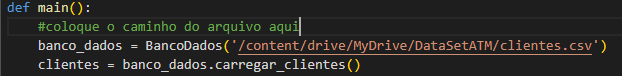






In [ ]:
import csv

In [ ]:
#conecta google colab ao drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Classe Pessoa / Classe Cliente / Classe Gerente**

###**Pessoa**

In [ ]:
class Pessoa:
    def __init__(self, nome, cpf_cnpj, endereco, telefone, senha):
        self.nome = nome
        self.cpf_cnpj = cpf_cnpj
        self.endereco = endereco
        self.telefone = telefone
        self.senha = senha

###**Cliente**

In [ ]:
class Cliente(Pessoa):
    def __init__(self, nome, cpf_cnpj, endereco, telefone, senha, saldo):
        super().__init__(nome, cpf_cnpj, endereco, telefone, senha)
        self.saldo = saldo
        self.historico = []

    def realizar_saque(self, valor):
        if valor <= self.saldo:
            self.saldo -= valor
            self.historico.append(f"Saque: R${valor}")
            print(f"Saque de R${valor} realizado com sucesso.")
        else:
            print("Saldo insuficiente.")

    def realizar_deposito(self, valor):
        if valor > 0:
            self.saldo += valor
            self.historico.append(f"Depósito: R${valor}")
            print(f"Depósito de R${valor} realizado com sucesso.")
        else:
            print("Valor de depósito inválido.")

    def realizar_pagamento_programado(self, valor):
        if valor <= self.saldo:
            self.saldo -= valor
            self.historico.append(f"Pagamento Programado: R${valor}")
            print(f"Pagamento programado de R${valor} realizado com sucesso.")
        else:
            print("Saldo insuficiente para realizar o pagamento programado.")

    def verificar_historico(self):
        print("Histórico de ações:")
        for acao in self.historico:
            print(acao)

    def solicitar_credito(self, valor):
        if valor > 0:
            self.historico.append(f"Solicitação de Crédito: R${valor}")
            print(f"Solicitação de crédito de R${valor} realizada com sucesso. Será debitado em datas programadas.")
        else:
            print("Valor de crédito inválido.")

###**Gerente**

In [ ]:
class Gerente(Pessoa):
    def __init__(self, nome, cpf_cnpj, endereco, telefone, senha):
        super().__init__(nome, cpf_cnpj, endereco, telefone, senha)

    def cadastrar_cliente(self, clientes, cliente):
        clientes.append(cliente)
        print("Cliente cadastrado com sucesso.")

    def remover_cliente(self, clientes, cliente):
        clientes.remove(cliente)
        print("Cliente removido com sucesso.")

    def editar_cliente(self, cliente, novo_nome):
        cliente.nome = novo_nome
        print("Cliente editado com sucesso.")

    def visualizar_clientes(self, clientes):
        print("Lista de clientes:")
        for cliente in clientes:
            print(cliente.nome)

##**Classe Banco Dados**

In [ ]:
class BancoDados:
    def __init__(self, nome_arquivo):
        self.nome_arquivo = nome_arquivo

    def carregar_clientes(self):
        clientes = []
        with open(self.nome_arquivo, newline='') as file:
            reader = csv.DictReader(file)
            for row in reader:
                clientes.append(row)
        return clientes

    def salvar_clientes(self, clientes):
        with open(self.nome_arquivo, 'w', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=clientes[0].keys())
            writer.writeheader()
            writer.writerows(clientes)

    def cadastrar_cliente(self, cliente):
        clientes = self.carregar_clientes()
        clientes.append(cliente)
        self.salvar_clientes(clientes)

    def cliente_existe(self, cpf_cnpj):
        clientes = self.carregar_clientes()
        for cliente in clientes:
            if cliente['CPF/CNPJ'] == cpf_cnpj:
                return True
        return False

def exibir_menu():
    print("----- Menu de Opções -----")
    print("0 - Sair")
    print("1 - Realizar Saque")
    print("2 - Realizar Depósito")
    print("3 - Realizar Pagamento Programado")
    print("4 - Verificar Histórico")
    print("5 - Solicitar Crédito")

def cadastrar_novo_cliente():
    nome = input("Nome: ")
    cpf_cnpj = input("CPF/CNPJ: ")
    endereco = input("Endereço: ")
    telefone = input("Telefone: ")
    senha = int(input("Senha: "))
    saldo = float(input("Saldo inicial: "))

    return {'Nome': nome, 'CPF/CNPJ': cpf_cnpj, 'Endereço': endereco,
            'Telefone': telefone, 'Senha': senha, 'Saldo': saldo}

##**Classe Caixa Eletronico**

In [ ]:
class CaixaEletronico:
    def __init__(self, cliente):
        self.cliente = cliente

    def realizar_saque(self, valor):
        if self.cliente.saldo >= valor:
            self.cliente.saldo -= valor
            self.cliente.historico.append(f"Saque: -{valor}")
            print("Saque realizado com sucesso.")
        else:
            print("Saldo insuficiente.")

    def realizar_deposito(self, valor):
        self.cliente.saldo += valor
        self.cliente.historico.append(f"Depósito: +{valor}")
        print("Depósito realizado com sucesso.")

    def realizar_pagamento_programado(self, valor):
        if self.cliente.saldo >= valor:
            self.cliente.saldo -= valor
            self.cliente.historico.append(f"Pagamento Programado: -{valor}")
            print("Pagamento programado realizado com sucesso.")
        else:
            print("Saldo insuficiente.")

    def verificar_historico(self):
        print("Histórico de transações:")
        for transacao in self.cliente.historico:
            print(transacao)

    def solicitar_credito(self, valor):
        if valor > 0:
            self.cliente.saldo += valor
            self.cliente.historico.append(f"Solicitação de Crédito: +{valor}")
            print("Solicitação de crédito realizada com sucesso.")
        else:
            print("Valor inválido para solicitação de crédito.")

def main():
    #coloque o caminho do arquivo aqui
    banco_dados = BancoDados('clientes.csv')
    clientes = banco_dados.carregar_clientes()

    while True:
        print("Sistema Bancário")
        print("1 - Realizar Login")
        print("2 - Cadastrar Novo Cliente")
        print("0 - Sair")

        opcao = input("Opção: ")

        if opcao == '1':
            cpf_cnpj = input("CPF/CNPJ: ")
            senha = int(input("Senha: "))

            cliente_encontrado = None
            for cliente in clientes:
                if cliente['CPF/CNPJ'] == cpf_cnpj and int(cliente['Senha']) == senha:
                    cliente_encontrado = cliente
                    break

            if cliente_encontrado:
                cliente = Cliente(cliente_encontrado['Nome'], cliente_encontrado['CPF/CNPJ'],
                                  cliente_encontrado['Endereço'], cliente_encontrado['Telefone'],
                                  int(cliente_encontrado['Senha']), float(cliente_encontrado['Saldo']))
                caixa_eletronico = CaixaEletronico(cliente)

                while True:
                    exibir_menu()
                    opcao = input("Opção: ")

                    if opcao == '0':
                        break
                    elif opcao == '1':
                        valor = float(input("Digite o valor do saque: "))
                        caixa_eletronico.realizar_saque(valor)
                    elif opcao == '2':
                        valor = float(input("Digite o valor do depósito: "))
                        caixa_eletronico.realizar_deposito(valor)
                    elif opcao == '3':
                        valor = float(input("Digite o valor do pagamento programado: "))
                        caixa_eletronico.realizar_pagamento_programado(valor)
                    elif opcao == '4':
                        caixa_eletronico.verificar_historico()
                    elif opcao == '5':
                        valor = float(input("Digite o valor do crédito: "))
                        caixa_eletronico.solicitar_credito(valor)
                    else:
                        print("Opção inválida.")

            else:
                print("CPF/CNPJ ou senha inválidos.")

        elif opcao == '2':
            novo_cliente = cadastrar_novo_cliente()
            if banco_dados.cliente_existe(novo_cliente['CPF/CNPJ']):
                print("Cliente já cadastrado.")
            else:
                banco_dados.cadastrar_cliente(novo_cliente)
                clientes = banco_dados.carregar_clientes()
                cliente = Cliente(novo_cliente['Nome'], novo_cliente['CPF/CNPJ'], novo_cliente['Endereço'],
                                  novo_cliente['Telefone'], int(novo_cliente['Senha']), float(novo_cliente['Saldo']))
                caixa_eletronico = CaixaEletronico(cliente)

                while True:
                    exibir_menu()
                    opcao = input("Opção: ")

                    if opcao == '0':
                        break
                    elif opcao == '1':
                        valor = float(input("Digite o valor do saque: "))
                        caixa_eletronico.realizar_saque(valor)
                    elif opcao == '2':
                        valor = float(input("Digite o valor do depósito: "))
                        caixa_eletronico.realizar_deposito(valor)
                    elif opcao == '3':
                        valor = float(input("Digite o valor do pagamento programado: "))
                        caixa_eletronico.realizar_pagamento_programado(valor)
                    elif opcao == '4':
                        caixa_eletronico.verificar_historico()
                    elif opcao == '5':
                        valor = float(input("Digite o valor do crédito: "))
                        caixa_eletronico.solicitar_credito(valor)
                    else:
                        print("Opção inválida.")

        elif opcao == '0':
            break
        else:
            print("Opção inválida.")

if __name__ == '__main__':
    main()

Sistema Bancário
1 - Realizar Login
2 - Cadastrar Novo Cliente
0 - Sair
Opção: 2
Nome: marcio
CPF/CNPJ: 09882536698
Endereço: ceilandia
Telefone: 61999560772
Senha: 456852
Saldo inicial: 782
----- Menu de Opções -----
0 - Sair
1 - Realizar Saque
2 - Realizar Depósito
3 - Realizar Pagamento Programado
4 - Verificar Histórico
5 - Solicitar Crédito
Opção: 0
Sistema Bancário
1 - Realizar Login
2 - Cadastrar Novo Cliente
0 - Sair
Opção: 0
